<a href="https://colab.research.google.com/github/adibhosn/Geographic_Analysis/blob/main/WorldClim_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install georasters

In [ ]:
import georasters as gr
import numpy as np
import pandas as pd
import scipy as sp

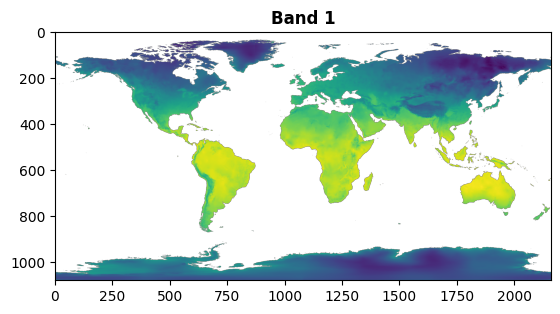

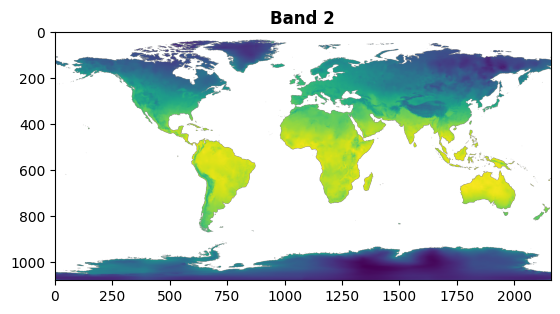

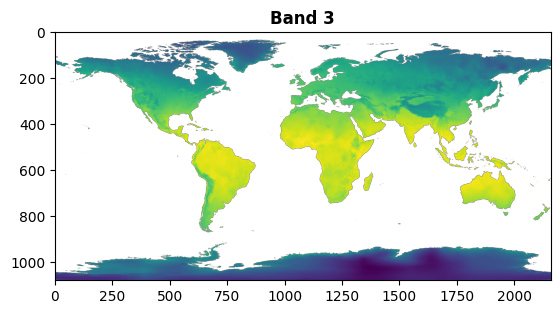

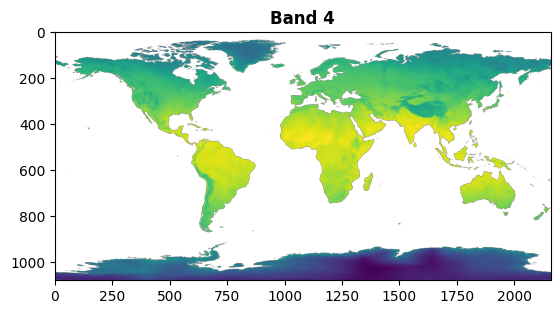

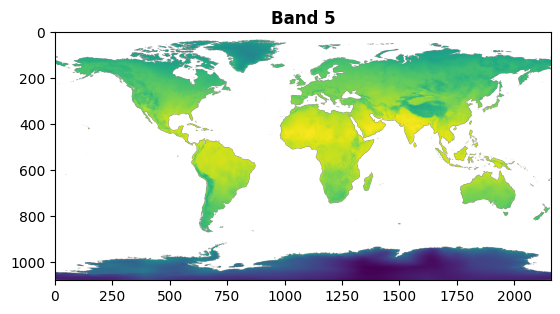

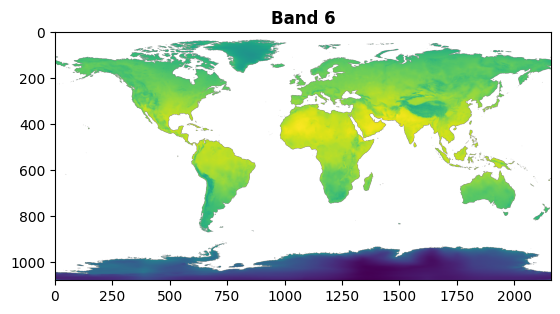

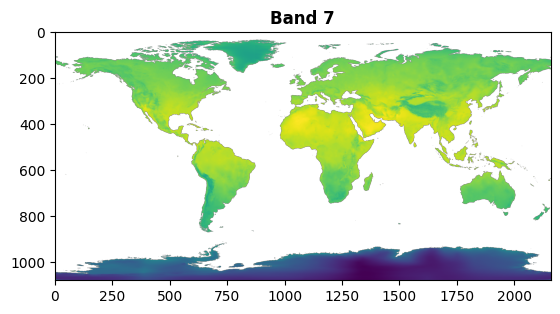

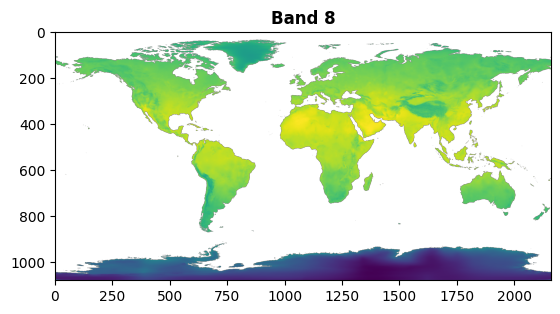

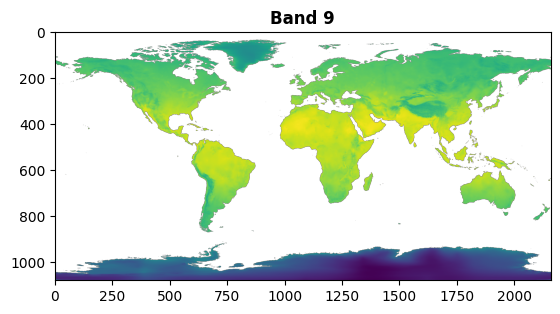

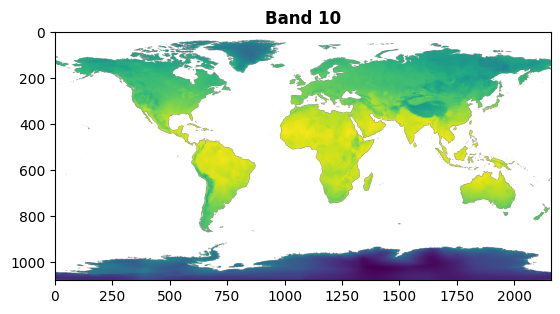

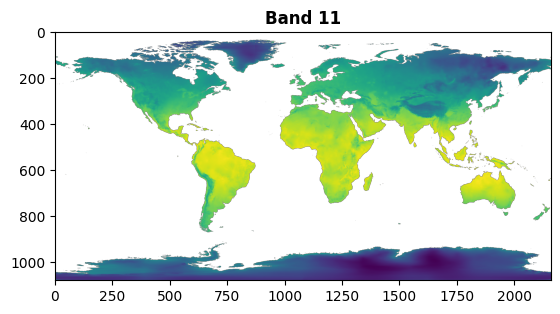

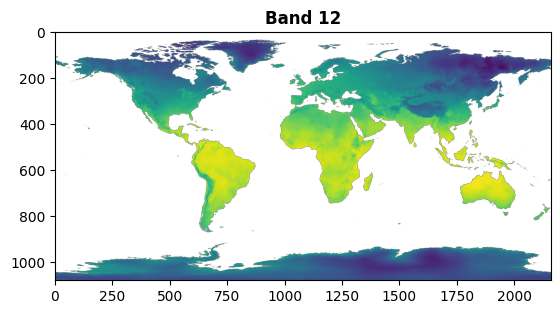

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

with rasterio.open('/content/drive/MyDrive/WORLDCLIM-Data&Shapes/wc2.1_10m_tmin_ACCESS-CM2_ssp126_2021-2040.tif') as src:
    for i in range(1, src.count + 1):
        plt.figure()
        show(src.read(i), title=f'Band {i}')


# Importe as bibliotecas necessárias:

In [ ]:
import rasterio
from rasterio.features import shapes
import geopandas as gpd
from shapely.geometry import shape


# Lendo dados

In [ ]:
with rasterio.open('/content/drive/MyDrive/WORLDCLIM-Data&Shapes/wc2.1_10m_tmin_ACCESS-CM2_ssp126_2021-2040.tif') as src:
    image = src.read(1)  # Lê a primeira banda
    mask = image != src.nodata  # Cria uma máscara para valores válidos


# Extraindo as formas geométricas e valores do raster

In [ ]:
results = (
    {'properties': {'value': v}, 'geometry': s}
    for s, v in shapes(image, mask=mask, transform=src.transform)
)
results

<generator object <genexpr> at 0x79bb59c0e420>

# Transformando para geodataframe

In [ ]:
geoms = list(results)
gdf = gpd.GeoDataFrame.from_features(geoms)
gdf.crs = src.crs  # Define o sistema de coordenadas


<Axes: >

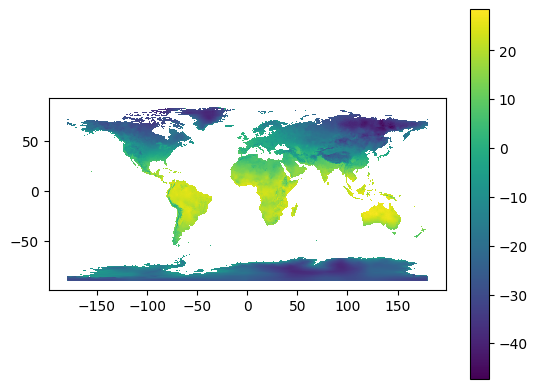

In [ ]:
gdf.plot(column='value', legend=True)

In [ ]:
pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
pip install rasterio

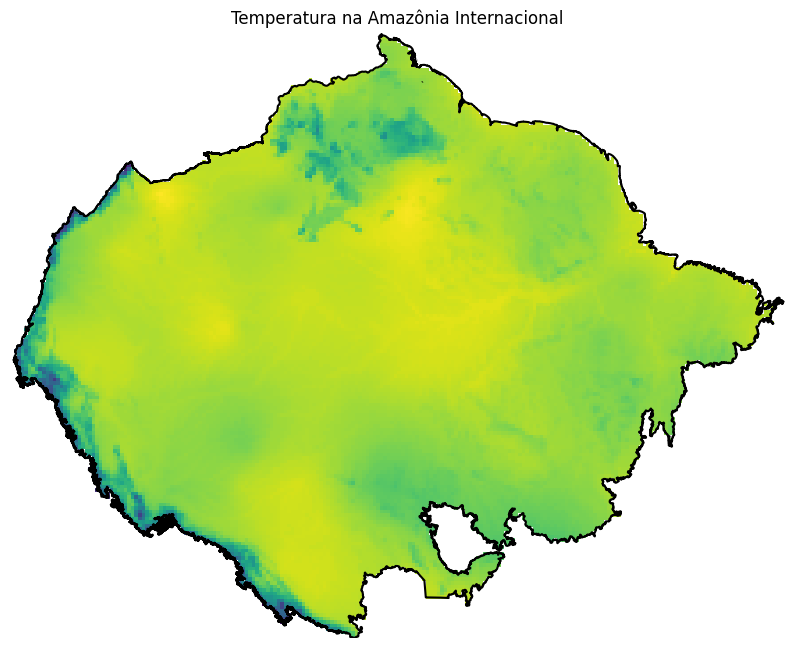

In [ ]:
import geopandas as gpd
import rioxarray as rxr
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.mask import mask
import numpy as np
import json

# Carregar shapefile da Amazônia internacional
amazonia_shp = gpd.read_file("/content/drive/MyDrive/WORLDCLIM-Data&Shapes/LimBiogeografico.shp")

# Carregar mapa de temperatura global
temp_data = rxr.open_rasterio("/content/drive/MyDrive/WORLDCLIM-Data&Shapes/wc2.1_10m_tmin_ACCESS-CM2_ssp126_2021-2040.tif")

#setando CRS
amazonia_shp.set_crs("EPSG:4326", inplace=True)

# Agora já pode converter para o CRS do raster
amazonia_shp = amazonia_shp.to_crs(temp_data.rio.crs)

# Garantir que ambos os datasets estão na mesma projeção
amazonia_shp = amazonia_shp.to_crs(temp_data.rio.crs)

# Recortar o raster usando o shapefile
coords = [json.loads(amazonia_shp.to_json())['features'][0]['geometry']]
with rasterio.open("/content/drive/MyDrive/WORLDCLIM-Data&Shapes/wc2.1_10m_tmin_ACCESS-CM2_ssp126_2021-2040.tif") as src:
    out_image, out_transform = mask(src, coords, crop=True)
    out_meta = src.meta.copy()

# Atualizar metadados para refletir o novo recorte
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

# Selecionar a primeira banda (índice 0) para visualização
out_image_single_band = out_image[0]

# Plotar
fig, ax = plt.subplots(figsize=(10, 8))
show(out_image_single_band, transform=out_transform, ax=ax)
amazonia_shp.boundary.plot(ax=ax, edgecolor='black')

plt.title("Temperatura na Amazônia Internacional")
ax.axis('off')
plt.show()


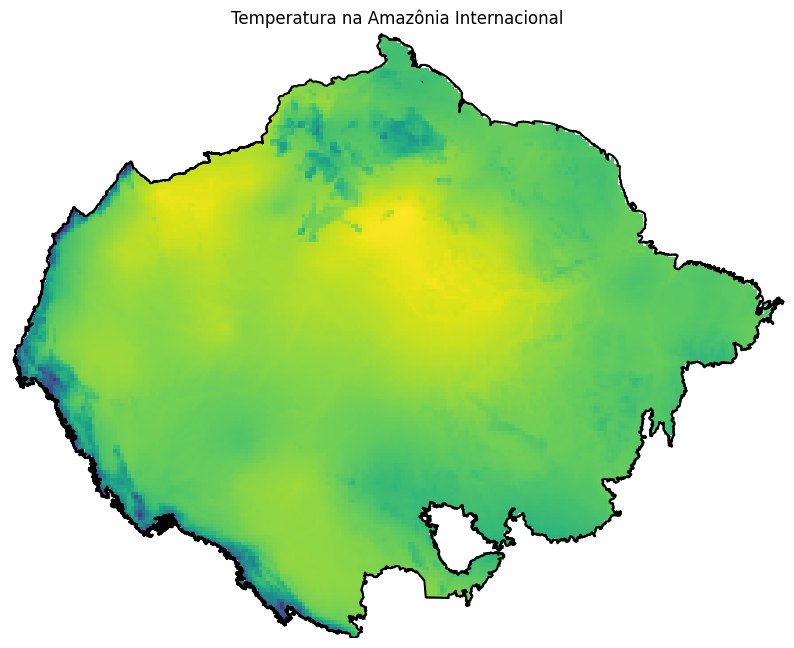

In [ ]:
import geopandas as gpd
import rioxarray as rxr
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.mask import mask
import numpy as np
import json

# Carregar shapefile da Amazônia internacional
amazonia_shp = gpd.read_file("/content/drive/MyDrive/WORLDCLIM-Data&Shapes/LimBiogeografico.shp")

# Carregar mapa de temperatura global
temp_data = rxr.open_rasterio("/content/drive/MyDrive/WORLDCLIM-Data&Shapes/wc2.1_10m_tmin_ACCESS-CM2_ssp585_2081-2100.tif")

#setando CRS
amazonia_shp.set_crs("EPSG:4326", inplace=True)

# Agora já pode converter para o CRS do raster
amazonia_shp = amazonia_shp.to_crs(temp_data.rio.crs)

# Garantir que ambos os datasets estão na mesma projeção
amazonia_shp = amazonia_shp.to_crs(temp_data.rio.crs)

# Recortar o raster usando o shapefile
coords = [json.loads(amazonia_shp.to_json())['features'][0]['geometry']]
with rasterio.open("/content/drive/MyDrive/WORLDCLIM-Data&Shapes/wc2.1_10m_tmin_ACCESS-CM2_ssp585_2081-2100.tif") as src:
    out_image, out_transform = mask(src, coords, crop=True)
    out_meta = src.meta.copy()

# Atualizar metadados para refletir o novo recorte
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

# Selecionar a primeira banda (índice 0) para visualização
out_image_single_band = out_image[0]

# Plotar
fig, ax = plt.subplots(figsize=(10, 8))
show(out_image_single_band, transform=out_transform, ax=ax)
amazonia_shp.boundary.plot(ax=ax, edgecolor='black')
ax.axis('off')
plt.title("Temperatura na Amazônia Internacional")
plt.show()
